In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import numpy as np
import os
import statsmodels.api as sm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats
from statsmodels.distributions.mixture_rvs import mixture_rvs
from matplotlib.ticker import MaxNLocator
from numpy import trapz
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D 
from statistics import mean, median, mode, stdev
from scipy.stats import skew
from sklearn.manifold import MDS
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl

## Heatmap + KDE, individual delay users

In [7]:
direc = "Data/Individual/"
direc_counts = "Data/Individual_Counts/"
for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    #print(data)
    data_counts = pd.read_csv(os.path.join(direc_counts, file))
    #print(data_counts)
    list_counts = []
    for index, row in data_counts.iterrows():
        #print(row)
        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)
    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        print(x)
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
  

    x = list(data_cop.columns)
    y = list(data_cop.index)
    z = np.asmatrix(data_cop.values)

    #fig, ax1 = plt.subplots(1,1, figsize = (18,5))

    #c = ax1.pcolor(x, y, np.array(z), cmap="viridis", vmin=0, vmax=30)
    #ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
   
    
    #ax2 = ax1.twinx()
    
    #df.plot(kind='kde', ax= ax2, secondary_y=False , color = "grey", linewidth=0.5)
    
    
   
    #ax1.set_xlim(right=800, left=300)
    
    #ax2.set_ylim(bottom=0)
    #ax2.get_legend().remove()
    
    
    #ax2.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
    #                xytext=(0,-5), textcoords="offset points",
    #                ha="right", va="top", color = 'Red', fontsize=10)
    
    #ax2.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
    #                xytext=(0,-5), textcoords="offset points",
    #                ha="right", va="top", color = 'Red', fontsize=11)
    
    
    #ax1.set_xlabel('Time (ms)')
    #ax1.set_ylabel('Counts')
    
    #plt.yticks([])
    #plt.ylabel("")
    #data_aux = file.split(".")
    #data_aux = file.split(".")
    #data_aux = data_aux[0].split("_")
    #date_aux = data_aux[1].split("-")
    #plt.title("User: "+data_aux[0]+"\n"+"Date: "+date_aux[0]+"/"+date_aux[1]+"/2019 - "+date_aux[2][1:]+":"+date_aux[3]+"\n")
    
    #plt.axvline(x=731,color='red', linewidth=0.5)
    
    
    #axins = inset_axes(ax1,
    #               width="2%",  
    #               height="100%",  
    #               loc='lower left',
    #               bbox_to_anchor=(1.02, 0., 1, 1),
    #               bbox_transform=ax2.transAxes,
    #               borderpad=0,
    #               )
    
    #cb = fig.colorbar(c, ax=ax1, cax = axins)
    #cb.set_label('Time (s)')
    #plt.show()
    

300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549


TypeError: float() argument must be a string or a number, not 'tuple'

## Heatmap + KDE plot, global users delay

1002956450.csv


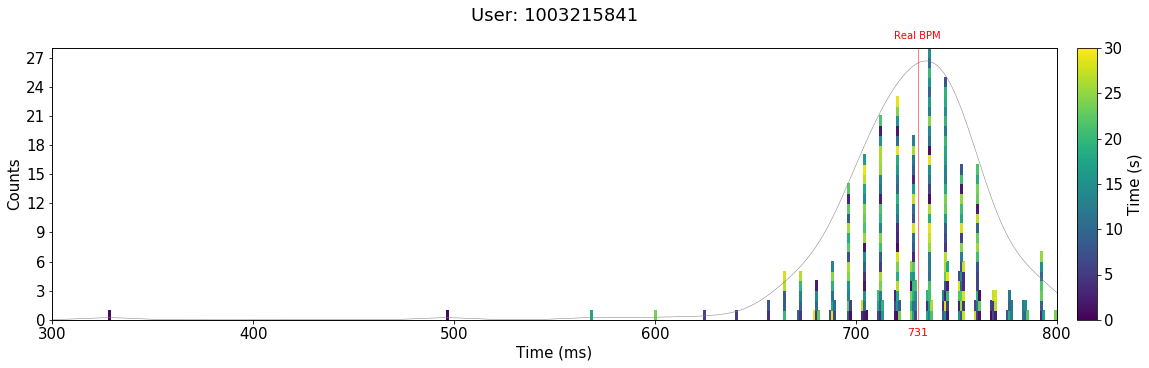

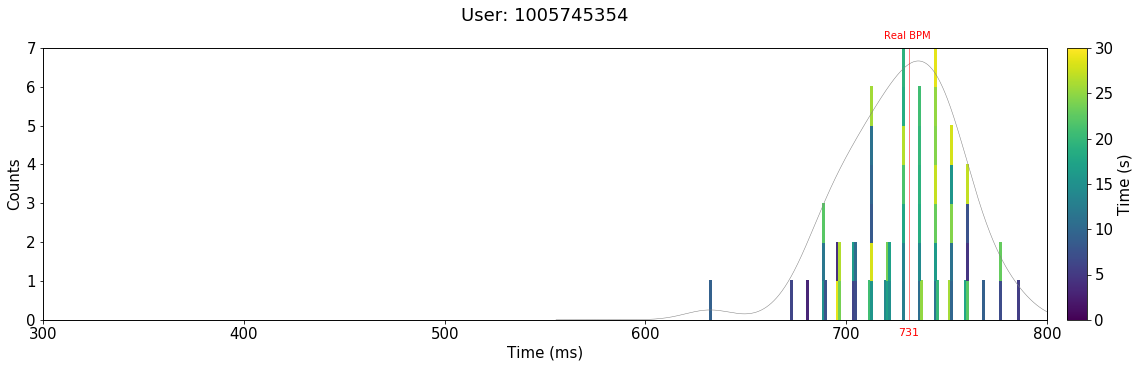

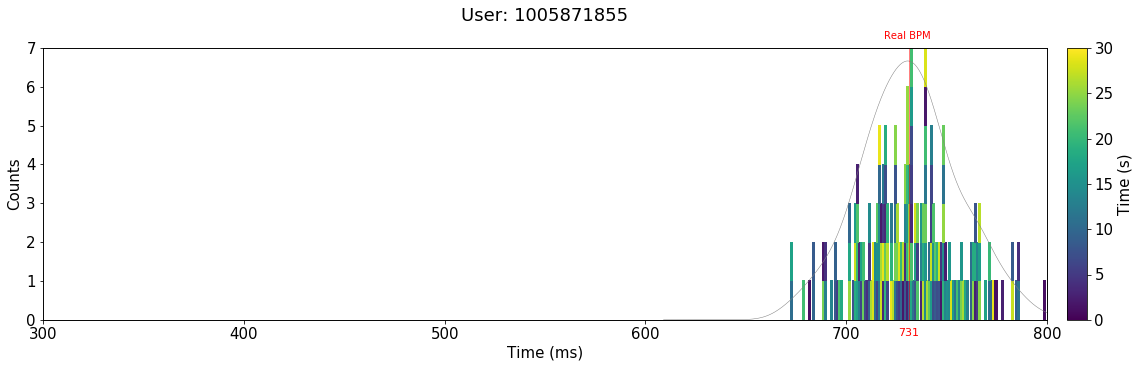

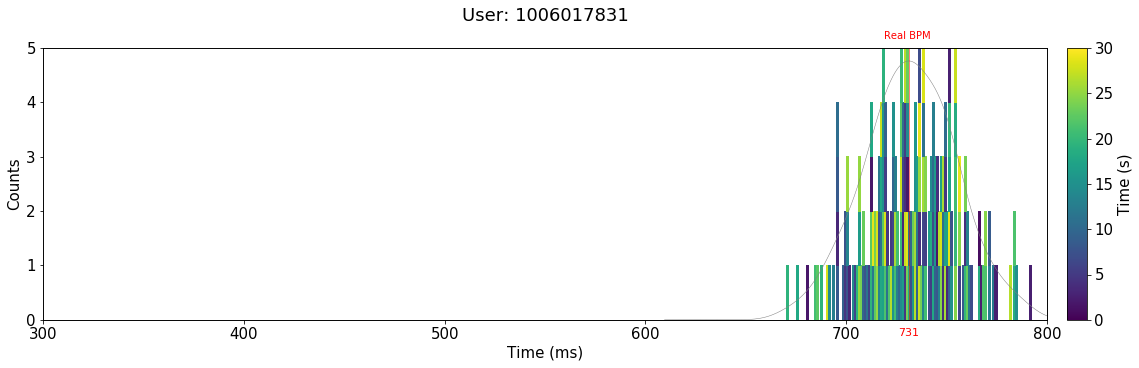

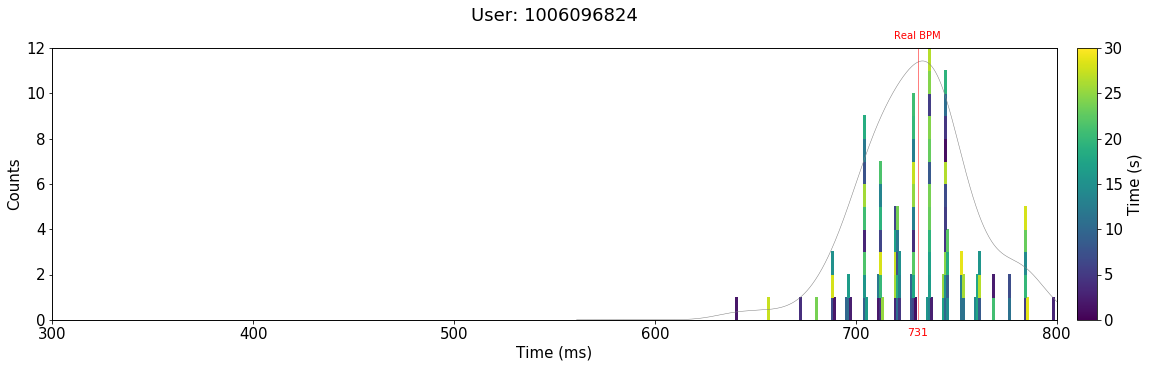

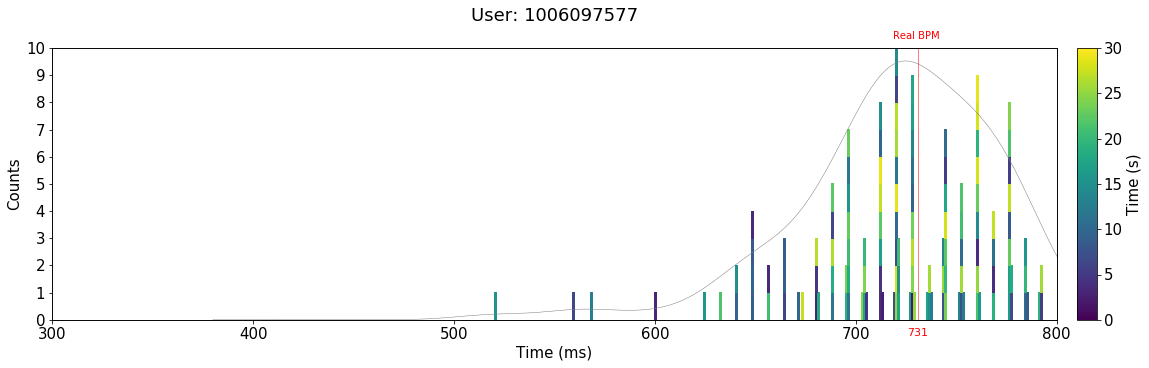

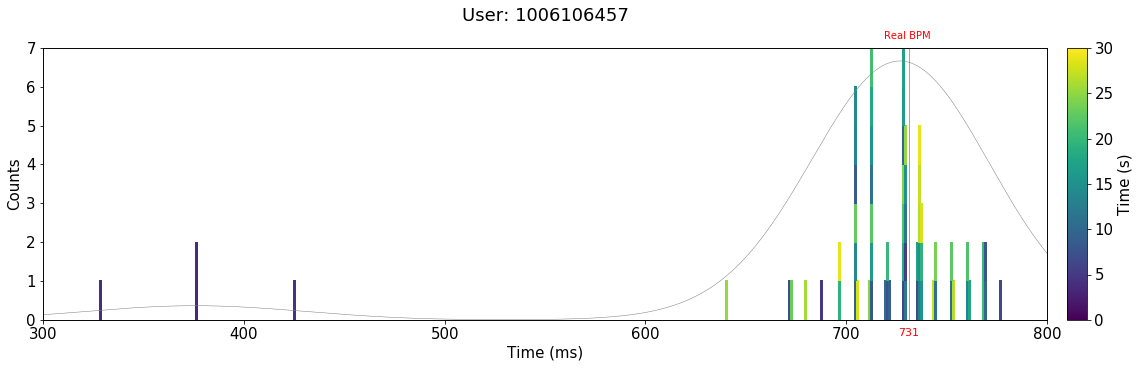

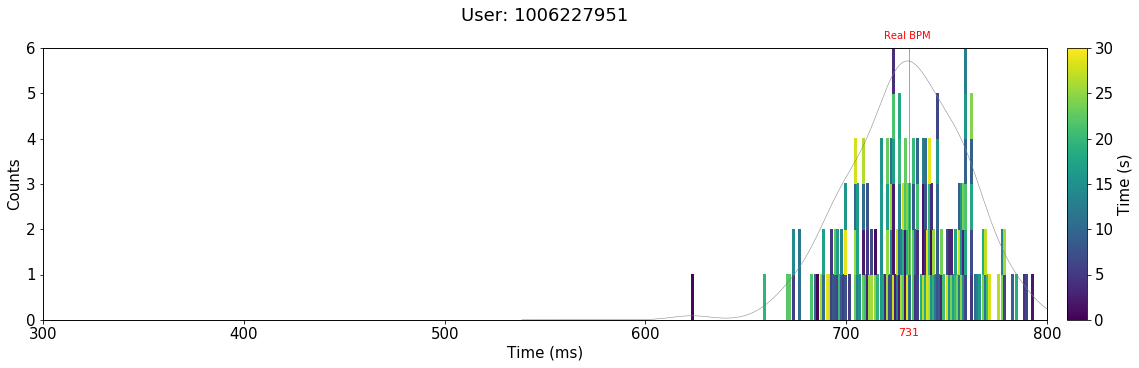

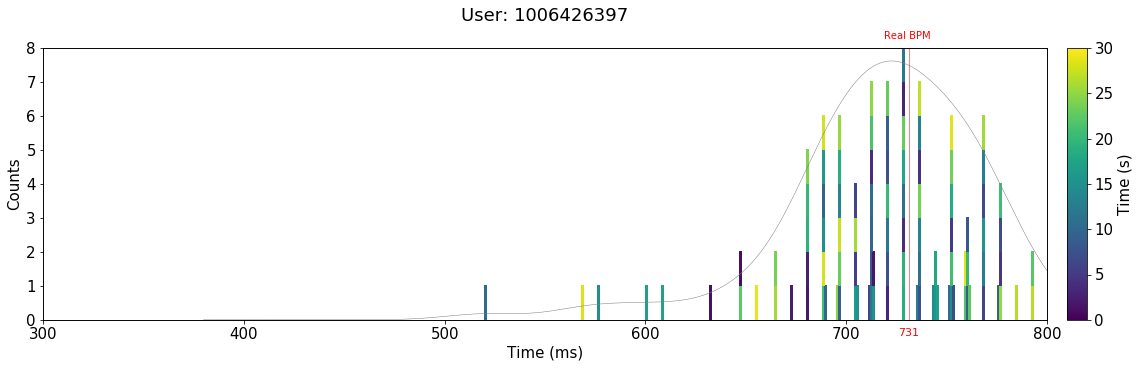

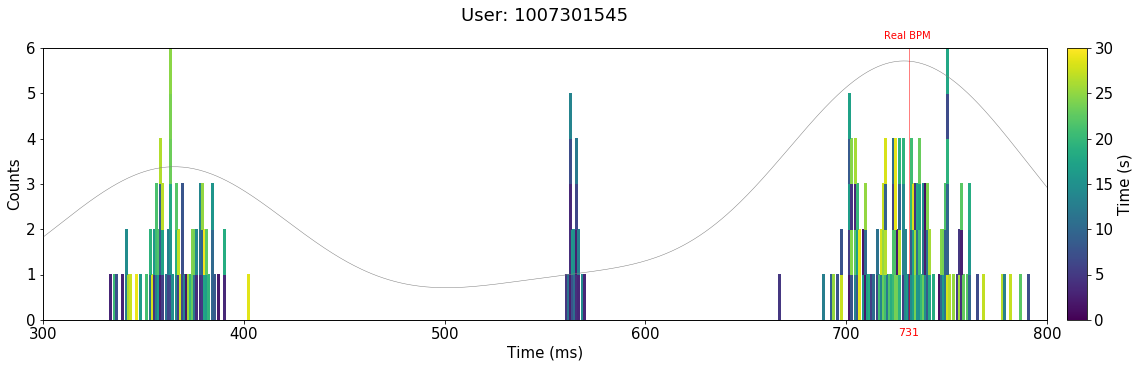

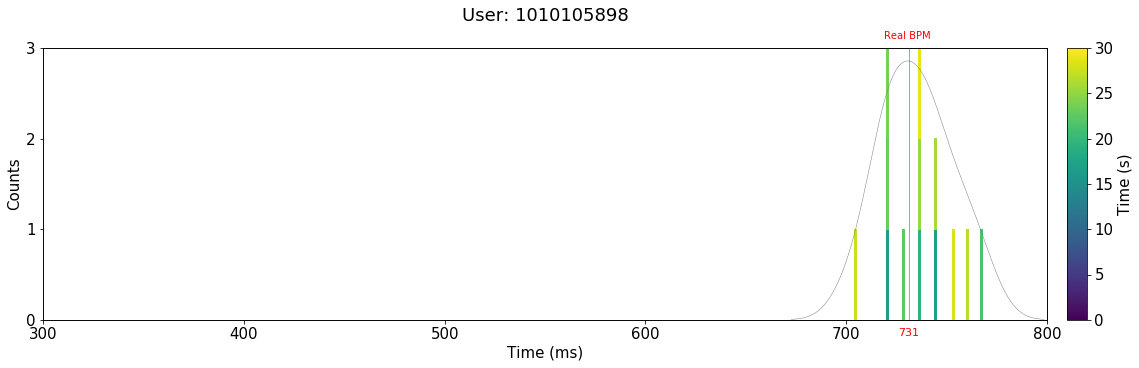

1010127958.csv


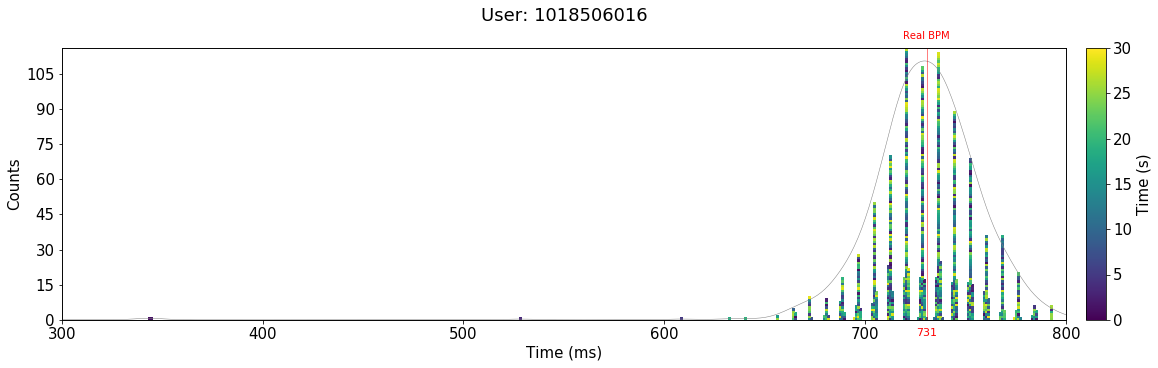

1061814443.csv


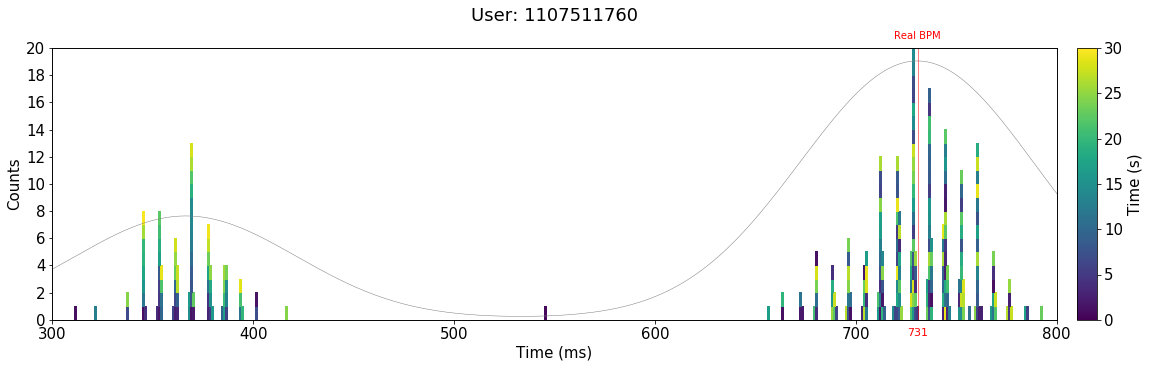

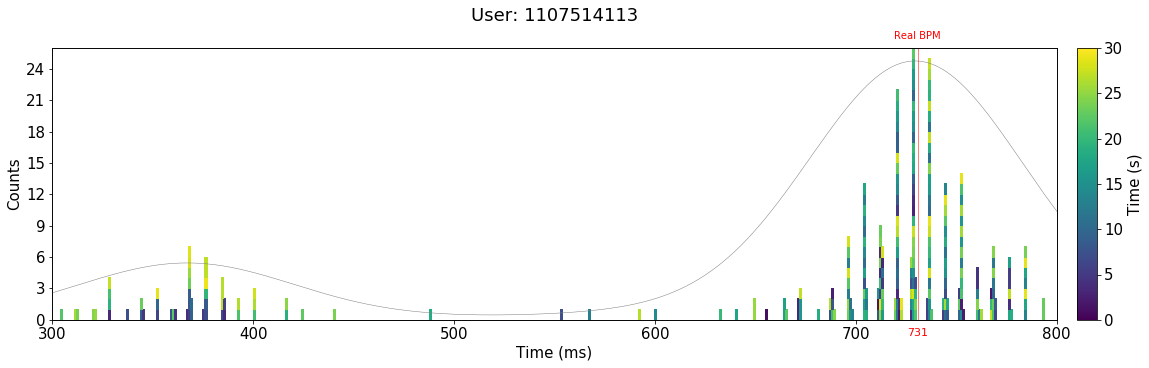

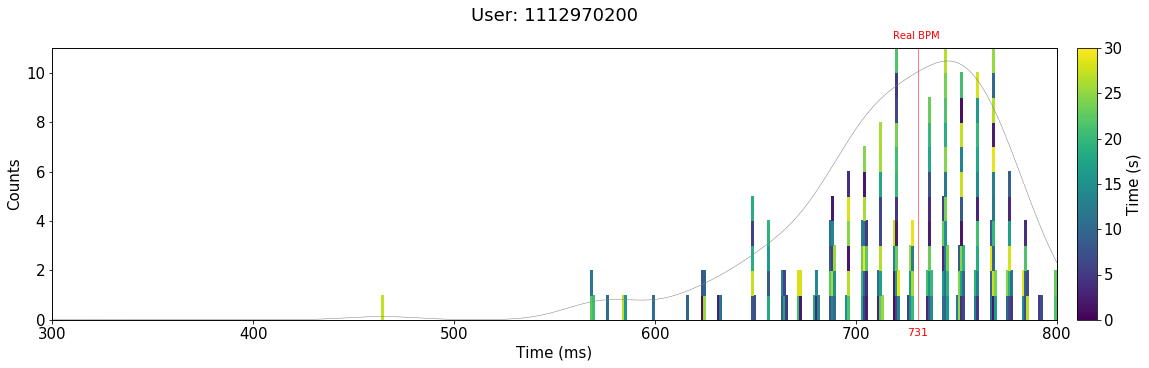

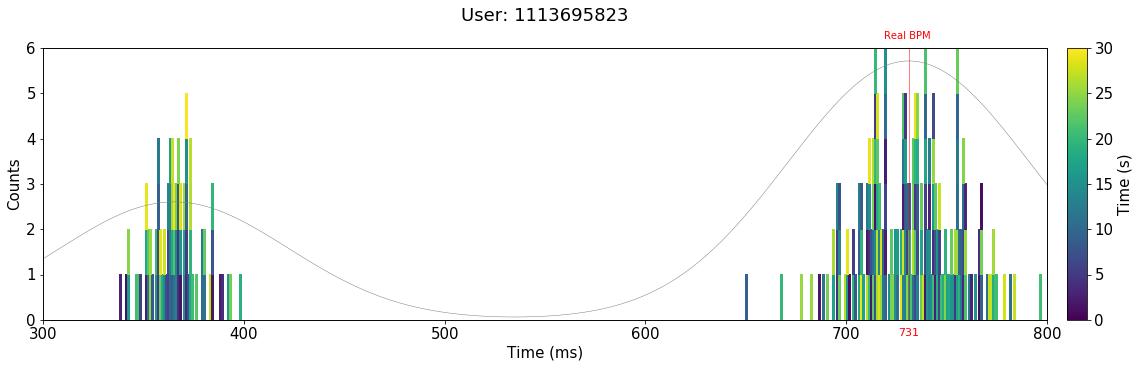

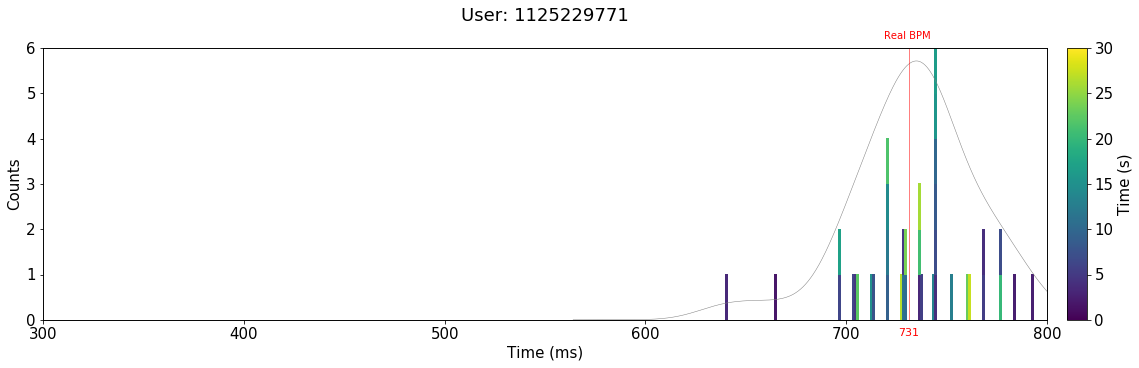

1143874902.csv


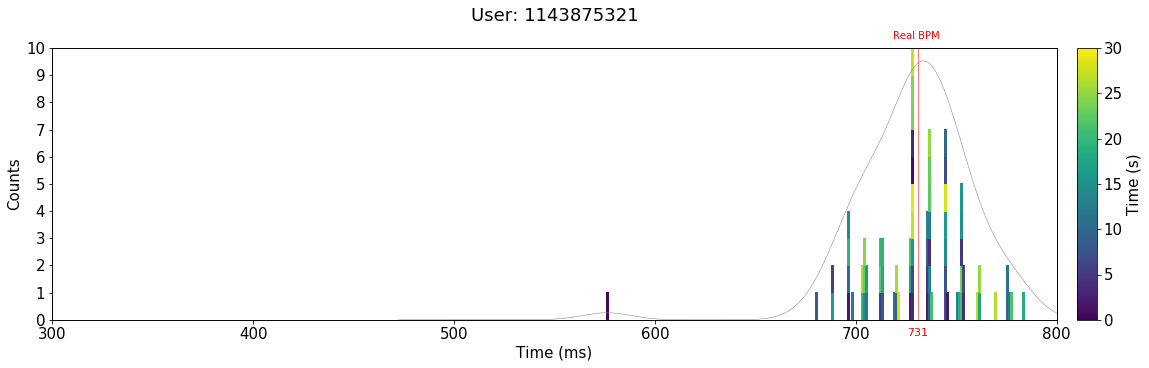

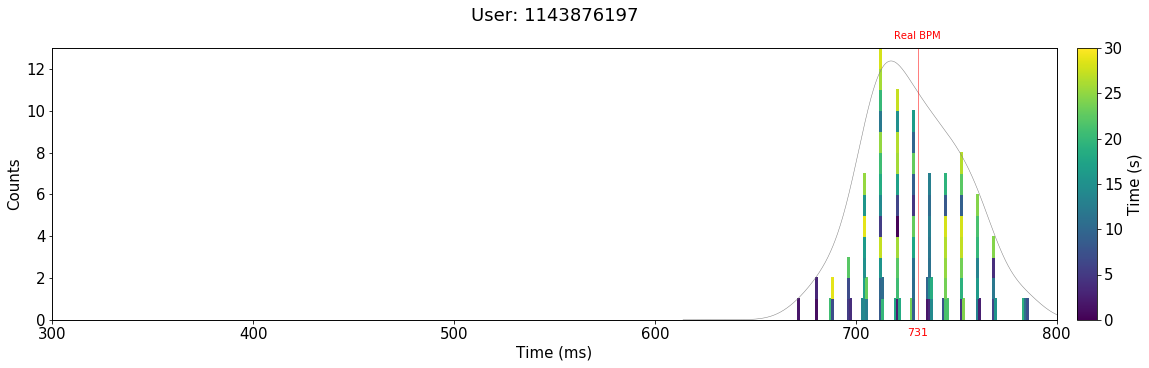

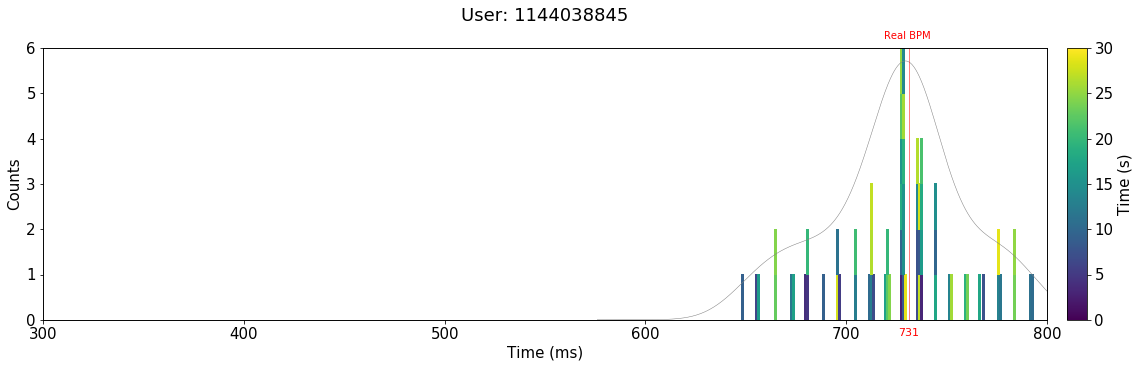

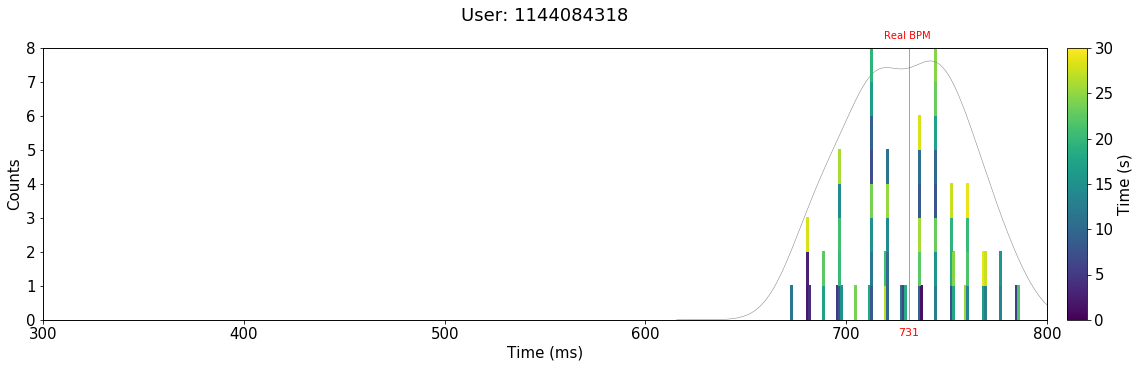

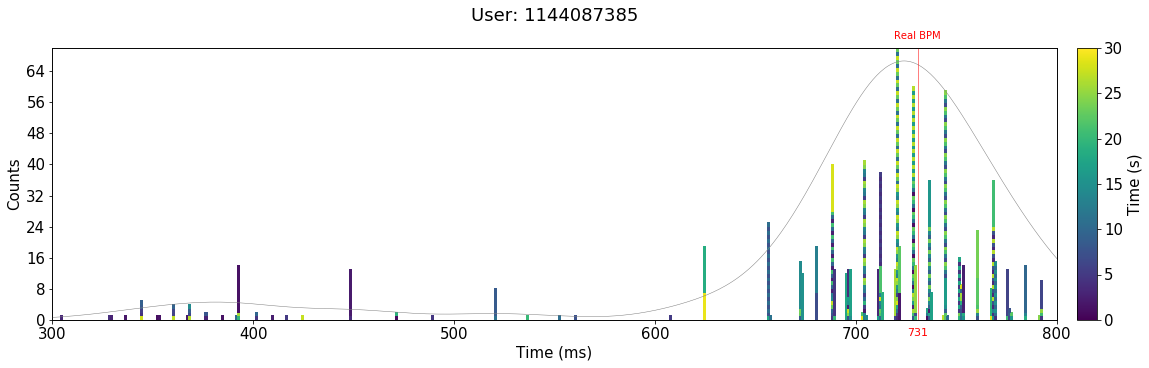

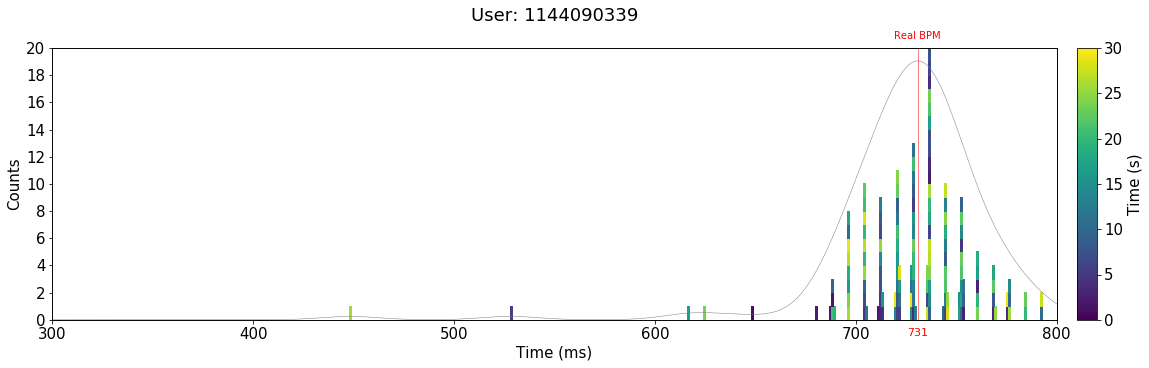

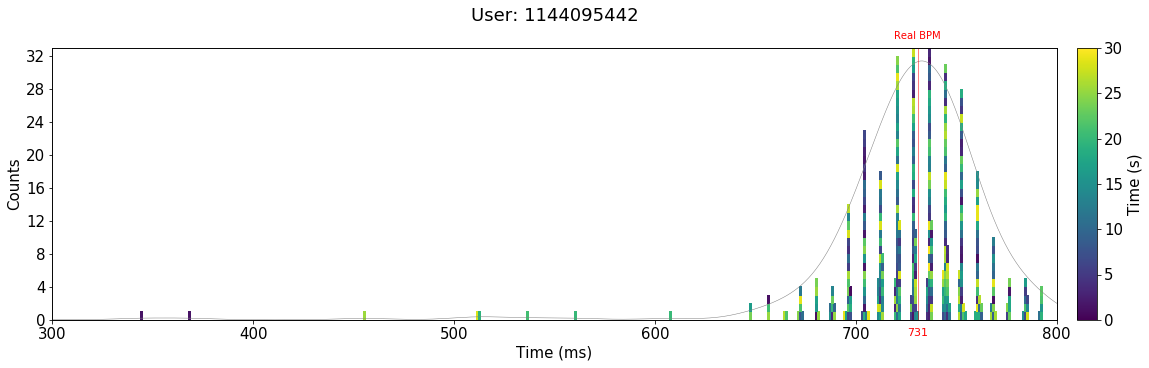

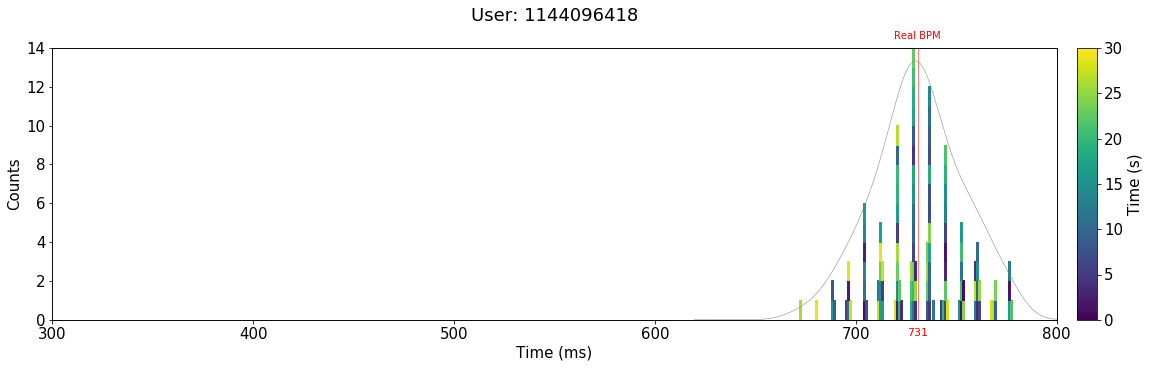

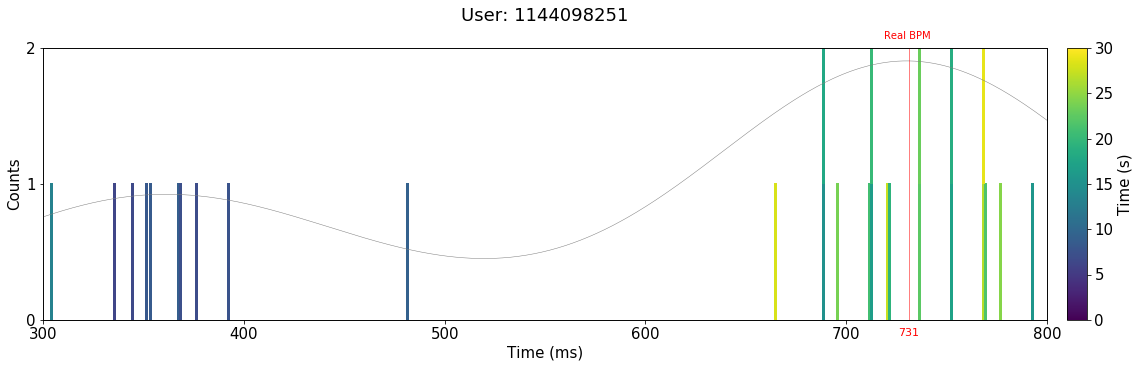

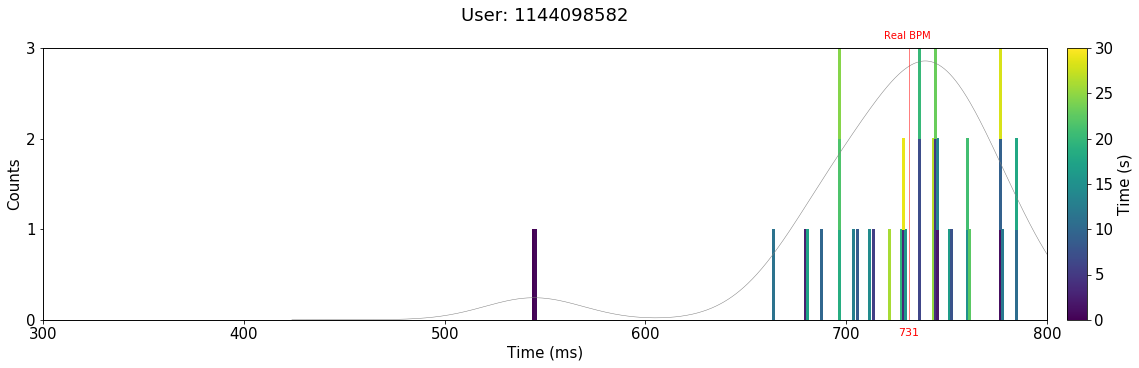

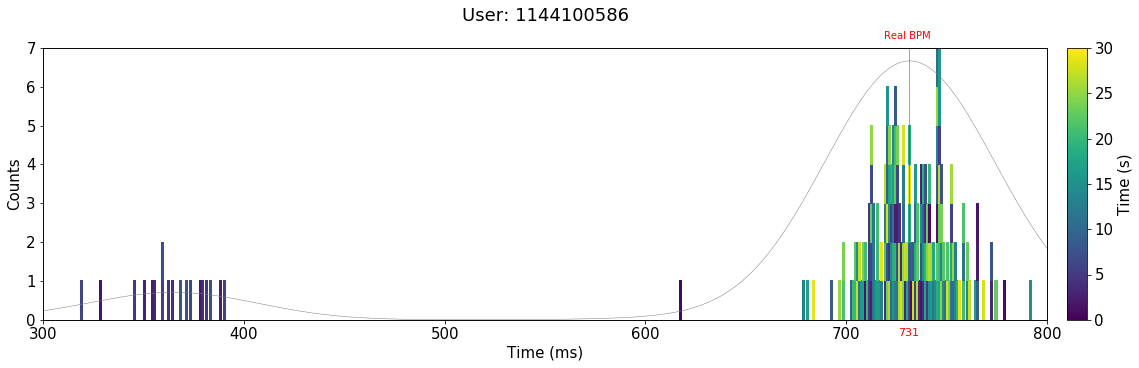

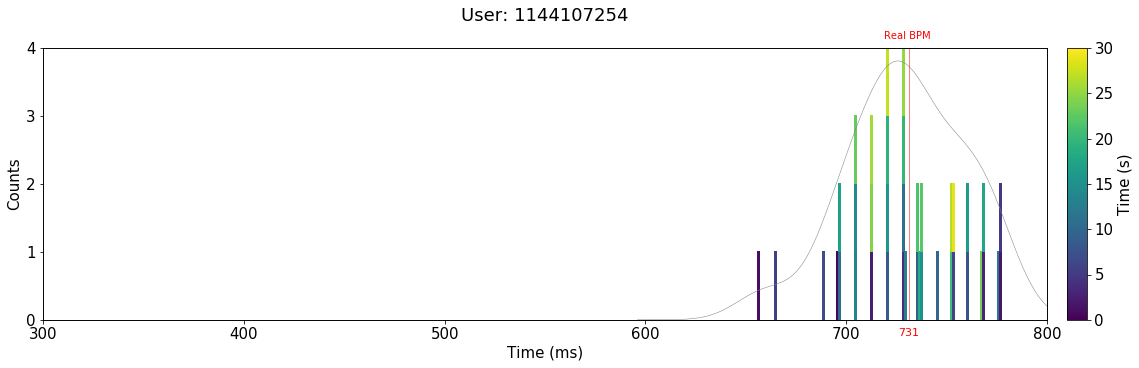

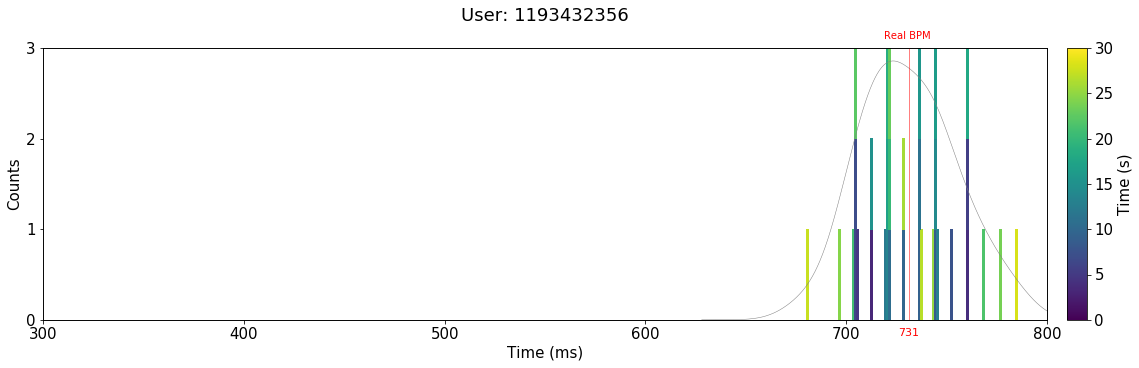

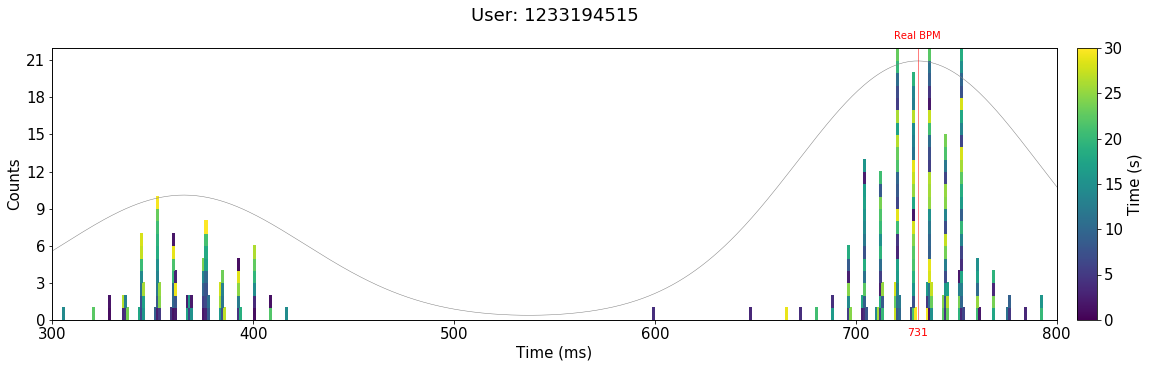

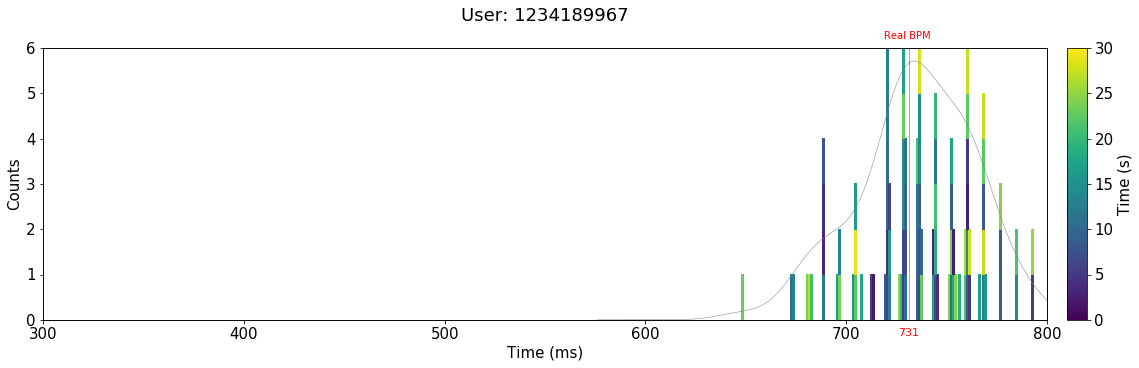

In [3]:
plt.rcParams.update({'font.size': 15})
direc = "Data/Global/"
direc_counts = "Data/Global_Counts/"
difference_dict = {}
users_kde = {}
users_ids = []
sharp_dict = {}
std_dict = {}
sknss_dict = {}
mean_dict = {}
median_dict = {}
mode_dict = {}

for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    data_counts = pd.read_csv(os.path.join(direc_counts, file))
    
    list_counts = []
    for index, row in data_counts.iterrows():
        act_x = row[1]
        while act_x > 0:
            list_counts.append(int(row[0]))
            act_x = act_x - 1

    df = pd.DataFrame(list_counts)
    aux_name = file.split(".")
    if len(list_counts) != 0:
        sharp_dict[aux_name[0]] = mean(list_counts) / stdev(list_counts)
        std_dict[aux_name[0]] = stdev(list_counts)
        sknss_dict[aux_name[0]] = skew(list_counts)


        list_aux = []
        for x in data.value:
            list_aux.append(int(round(x*1000,0)))
        data.value=pd.Series(list_aux)

        data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)

        aux_data = data_cop
        keys = list(data_cop.keys())

        while start <= end:
            if start not in keys:
                data_cop[start] = np.nan

            start += 1


        colums = list(data_cop.keys())
        colums.sort()

        data_cop = data_cop[colums]

        line=0
        for x in data_cop.keys():
            line+=1

            if float(x) >= 731:
                line-=2
                break


        for index in data_cop.keys():
            if (index < 300) | (index > 800):
                data_cop = data_cop.drop([index], axis= 1)


        x = list(data_cop.columns)
        y = list(data_cop.index)
        z = np.asmatrix(data_cop.values)


        fig, ax1 = plt.subplots(1,1, figsize = (18,5))

        c = ax1.pcolor(x, y, np.array(z), cmap="viridis", vmin=0, vmax=30)
        ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax2 = ax1.twinx()
        kde = df.plot(kind='kde', ax= ax2, secondary_y=False , color = "grey", linewidth=0.5)

        data_aux = file.split(".")
        data_aux = data_aux[0].split("_")

        array_kde_y = kde.get_children()[0]._y
        array_kde_x = kde.get_children()[0]._x

        max_inx = np.argmax(array_kde_y)
        max_kde_value_y = array_kde_y[max_inx]
        max_kde_value_x = array_kde_x[max_inx]
        difference_dict[data_aux[0]] = max_kde_value_x

        users_kde[data_aux[0]] = kde.get_children()[0]
        users_ids.append(data_aux[0])
        ax1.set_xlim(right=800, left=300)

        ax2.set_ylim(bottom=0)
        ax2.get_legend().remove()


        ax2.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
                        xytext=(0,-5), textcoords="offset points",
                        ha="right", va="top", color = 'Red', fontsize=10)

        ax2.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
                        xytext=(0,-5), textcoords="offset points",
                        ha="right", va="top", color = 'Red', fontsize=11)


        ax1.set_xlabel('Time (ms)')
        ax1.set_ylabel('Counts')

        plt.yticks([])
        plt.ylabel("")
        plt.title("User: "+data_aux[0]+"\n")
        plt.axvline(x=731,color='red', linewidth=0.5)


        axins = inset_axes(ax1,
                       width="2%", 
                       height="100%", 
                       loc='lower left',
                       bbox_to_anchor=(1.02, 0., 1, 1),
                       bbox_transform=ax2.transAxes,
                       borderpad=0,
                       )

        cb = fig.colorbar(c, ax=ax1, cax = axins)
        cb.set_label('Time (s)')
        plt.show()
        
    else:
        print(file)


Calculate the difference between ideal (731) and the max value and write a file

In [4]:
for user in difference_dict.keys():
    act = difference_dict[user]
    difference_dict[user] = abs(act-731)

In [5]:
f = open("difference.txt", "w")
msg="User,Difference\n"
for user in difference_dict.keys():
    msg += user + "," + str(difference_dict[user]) + "\n"
f.write(msg)
f.close()

## Heatmap for Individual users, all delays.

In [9]:
direc = "Data/Individual/"

for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))

    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
  #  line=0
  #  for x in data_cop.keys():
  #      line+=1
  #      print(x)
  #      if float(x) >= 731:
  #          line-=2
  #          break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
            
            
    num_ticks = 6
    xticks = np.linspace(0, len(data_cop.keys())-1, num_ticks, dtype=np.int)
    xtickslabels = [data_cop.keys()[idx] for idx in xticks]
    
    #plt.figure(figsize = (18,5)) 
    #ax = plt.axes()
    #sns.heatmap(data_cop, linewidths=.1 , cmap="viridis", vmin=0, vmax=30, ax=ax, xticklabels=xtickslabels, yticklabels=False)
    #ax.invert_yaxis()
    #ax.vlines([line+1], *ax.get_ylim(), color ="r", Label="731", linewidth=0.5, linestyles= 'solid')
    #ax.set_xticks(xticks)
    #ax.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
    #                xytext=(0,-5), textcoords="offset points",
    #                ha="right", va="top", color = 'Red', fontsize=10)
    #ax.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
    #                xytext=(0,-5), textcoords="offset points",
    #                ha="right", va="top", color = 'Red', fontsize=11)
    #data_aux = file.split(".")
    #data_aux = file.split(".")
    #data_aux = data_aux[0].split("_")
    #date_aux = data_aux[1].split("-")
    #plt.title("User: "+data_aux[0]+"\n"+"Date: "+date_aux[0]+"/"+date_aux[1]+"/2019 - "+date_aux[2][1:]+":"+date_aux[3]+"\n")
    #plt.xlabel("time (ms)")
    #plt.xticks( rotation='horizontal')
    #plt.show()

TypeError: '<' not supported between instances of 'tuple' and 'int'

## Heatmap that contains all the delays from one user.

In [ ]:
direc = "Data/Global/"

for file in os.listdir(direc):
    
    start = 300
    end = 800
    data = pd.read_csv(os.path.join(direc, file))
    
    list_aux = []
    for x in data.value:
        list_aux.append(int(round(x*1000,0)))
    data.value=pd.Series(list_aux)

    data_cop = data.pivot_table(index='counts', columns='value',values='time', aggfunc = np.mean)
    
    aux_data = data_cop
    keys = list(data_cop.keys())
    
    while start <= end:
        if start not in keys:
            data_cop[start] = np.nan
            
        start += 1
        
    
    colums = list(data_cop.keys())
    colums.sort()
    
    data_cop = data_cop[colums]
    
    
    line=0
    for x in data_cop.keys():
        line+=1
        
        if float(x) >= 731:
            line-=2
            break
    
    
    for index in data_cop.keys():
        if (index < 300) | (index > 800):
            data_cop = data_cop.drop([index], axis= 1)
            
            
    
    num_ticks = 6
    xticks = np.linspace(0, len(data_cop.keys())-1, num_ticks, dtype=np.int)
    xtickslabels = [data_cop.keys()[idx] for idx in xticks]
    
    #plt.figure(figsize = (18,5)) 
    #ax = plt.axes()
    #sns.heatmap(data_cop, linewidths=.1 , cmap="viridis", vmin=0, vmax=30, ax=ax, xticklabels=xtickslabels, yticklabels=False)
    #ax.invert_yaxis()
    #ax.vlines([line+1], *ax.get_ylim(), color ="r", Label="731", linewidth=0.5, linestyles= 'solid')
    #ax.set_xticks(xticks)
    #ax.annotate("Real BPM", xy=(0.884,1.082), xycoords="axes fraction",
    #                xytext=(0,-5), textcoords="offset points",
    #                ha="right", va="top", color = 'Red', fontsize=10)
    #ax.annotate("731", xy=(0.872,-0.01), xycoords="axes fraction",
    #                xytext=(0,-5), textcoords="offset points",
    #                ha="right", va="top", color = 'Red', fontsize=11)
    #data_aux = file.split(".")
    #data_aux = data_aux[0].split("_")
    #plt.title("User: "+data_aux[0]+"\n")
    #plt.xlabel("time (ms)")
    #plt.xticks( rotation='horizontal')
    #plt.show()

# Find the area of the overlap comparing two users

Define two methods to find the overlap between two functions

In [ ]:
# 1233194515  1144095442

def get_y_from_x(x_values, y_values, x):
    
    find = True
    index = 0
    while(find):
        
        if index+1 >= len(x_values):
            find = False
            return None
        
        if round(x_values[index], 0) == round(x, 0):
            return y_values[index]
            find = False
        
        index += 1
        
    
def find_line(x_user1, y_user1, x_user2, y_user2):
    
    dict_values = {}

    for index in range(0, len(x_user1)):
        # search if in user 2 exists the sale value of x that user 1 
        value_y = get_y_from_x(x_user2, y_user2, x_user1[index])
        if value_y != None:
            if value_y >= y_user1[index]:
                dict_values[x_user1[index]] = y_user1[index]
            else:
                dict_values[x_user1[index]] = value_y
            
    return list(dict_values.keys()), list(dict_values.values())

Create the matrix

In [ ]:
user_name = {}
indx=0
for x in users_ids:
    user_name[indx] = x
    indx += 1
users_matrix = [[0 for x in range(len(users_ids))] for y in range(len(users_ids))]  

Method that compare two users and find the overlap

In [ ]:
for user_1 in range(0, len(users_ids)):
    for user_2 in range(0, len(users_ids)):
        
        if user_1 == user_2:
            users_matrix[user_1][user_2] = 1
        else:
            #us_1_name = user_name[user_1]
            #us_2_name = user_name[user_2]
            
            #usr1 = global_dict_gaps[us_1_name]
            #usr2 = global_dict_gaps[us_2_name]

            #kde_usr1 = sm.nonparametric.KDEUnivariate(usr1)
            kde_usr1 = users_kde[users_ids[user_1]]
            #kde_usr1.fit()

            #kde_usr2 = sm.nonparametric.KDEUnivariate(usr2)
            kde_usr2 = users_kde[users_ids[user_2]]
            #kde_usr2.fit()

            #fig, ax = plt.subplots(1, 1, figsize = (18,5))

            x, y = find_line(kde_usr1._x, kde_usr1._y, kde_usr2._x, kde_usr2._y)

            #line = Line2D(x, y, color="red", linestyle = '--', linewidth = 2)

            #ax.plot(kde_usr1._x, kde_usr1._y, color="yellow", lw=1)
            #ax.plot(kde_usr2._x, kde_usr2._y, color="blue", lw=1)
            #ax.add_line(line)
            #ax.set_xlim(-800, 800)
            area_rd = trapz(x=x, y=y)
            
            users_matrix[user_1][user_2] = area_rd
            
            #ax.set_xlabel('Time (ms)')
            #ax.set_ylabel('Density')
            #plt.title("User Yellow: "+users_ids[user_1]+"\n"+"User Blue: "+ users_ids[user_2] +"\n"+"Area: "+str(area_rd)+"\n")
            
            #plt.show()

# MDS

In [ ]:
row = 0
for x in range(len(users_matrix)):
    act = row
    while(act < len(users_matrix)):
        
        aux = users_matrix[x][act]
        users_matrix[act][x] = aux
        aux2=users_matrix[act][x]
        #print(str(x)+" "+str(act)+" = "+str(aux)+" | "+str(act)+" "+str(x)+" = "+str(aux2))
        act += 1
        
    row += 1

## Sharp Ratio

In [ ]:
table_matrix = [[0 for y in range(4)]for x in range(len(users_ids))]
indx = 0

for user in sharp_dict.keys():
    table_matrix[indx][0] = user[len(user)-3:]
    table_matrix[indx][1] = round(std_dict[user],3)
    table_matrix[indx][2] = round(sknss_dict[user],3)
    table_matrix[indx][3] = round(sharp_dict[user],3)
    indx += 1

aux = np.array(table_matrix)
aux = aux[aux[:,3].argsort()]
df = pd.DataFrame(aux)
df[1] = df[1].astype(float) 
df[2] = df[2].astype(float) 
df[3] = df[3].astype(float) 
df = df.sort_values([3], ascending=[False])

sharp_array = list(sharp_dict.values())
    
columns = ["User","Standard Deviation", "Skewness", "Sharp Ratio"]

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
pos = mds.fit(users_matrix)

coords = pos.embedding_

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,14))
ax1 = plt.subplot(221)

s=100
c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=sharp_array, cmap='viridis')

for label, x, y in zip(users_ids, coords[:, 0], coords[:, 1]):
    ax1.annotate(
        label[len(label)-3:],
        xy = (x, y), xytext = (10, -18),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

#plt.legend(scatterpoints=1, loc='best', shadow=False)
ax1.set_xlim(-0.7, 0.7)
ax1.set_ylim(-0.7, 0.7)


ax2 = plt.subplot(222)
ax2.axis('off')
ax2.axis('tight')
table = ax2.table(cellText= df.values,
          colLabels=columns,
          loc = 'center',
          cellLoc='center')
table.set_fontsize(18)
table.scale(1.2, 1.2)
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
        
        

ax3 = plt.subplot(212)
ax3.set_xlim(0, 35)
ax3.set_ylabel("Users")
ax3.set_xlabel("Sharp Ratio")
        
df = df.sort_values([3], ascending=[True])
color_list = []

norm = mpl.colors.Normalize(vmin=min(df[3].values), vmax=max(df[3].values))

for act in df[3].values:
    color_list.append(mpl.cm.viridis(norm(act)))
ax = plt.barh(df[0].values, df[3].values, data=df, color=color_list)


plt.suptitle("Sharp Ratio")
plt.show()

In [ ]:
f = open("Data/sharp.txt", "w")

msg = ""
for usr in sharp_dict.keys():
    msg += str(usr)+","+str(sharp_dict[usr])+"\n"

f.write(msg)
f.close()

## Skewness

In [ ]:
table_matrix = [[0 for y in range(4)]for x in range(len(users_ids))]
indx = 0

for user in sharp_dict.keys():
    table_matrix[indx][0] = user[len(user)-3:]
    table_matrix[indx][1] = round(std_dict[user],3)
    table_matrix[indx][2] = round(sknss_dict[user],3)
    table_matrix[indx][3] = round(sharp_dict[user],3)
    indx += 1

aux = np.array(table_matrix)
aux = aux[aux[:,3].argsort()]
df = pd.DataFrame(aux)
df[1] = df[1].astype(float) 
df[2] = df[2].astype(float) 
df[3] = df[3].astype(float) 
df = df.sort_values([2], ascending=[False])

skns_array = list(sknss_dict.values())
    
columns = ["User","Standard Deviation", "Skewness", "Sharp Ratio"]

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
pos = mds.fit(users_matrix)

coords = pos.embedding_

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,14))
ax1 = plt.subplot(221)

s=100

viridis = mpl.cm.get_cmap('viridis_r', len(users_ids))
c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=skns_array, cmap='viridis')
#c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=viridis.colors)

for label, x, y in zip(users_ids, coords[:, 0], coords[:, 1]):
    ax1.annotate(
        label[len(label)-3:],
        xy = (x, y), xytext = (10, -18),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

#plt.legend(scatterpoints=1, loc='best', shadow=False)
ax1.set_xlim(-0.7, 0.7)
ax1.set_ylim(-0.7, 0.7)


ax2 = plt.subplot(222)
ax2.axis('off')
ax2.axis('tight')
table = ax2.table(cellText= df.values,
          colLabels=columns,
          loc = 'center',
          cellLoc='center')
table.set_fontsize(18)
table.scale(1.2, 1.2)
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
        

ax3 = plt.subplot(212)
     
ax3.set_xlim(-6, 6)
ax3.set_ylabel("Users")
ax3.set_xlabel("Skewness")

df = df.sort_values([2], ascending=[True])
color_list = []

norm = mpl.colors.Normalize(vmin=min(df[2].values), vmax=max(df[2].values))

for act in df[2].values:
    color_list.append(mpl.cm.viridis(norm(act)))

ax3 = plt.barh(df[0].values, df[2].values, data=df, color=color_list)

plt.suptitle("Skewness")
plt.show()

## Standard deviation

In [ ]:
table_matrix = [[0 for y in range(4)]for x in range(len(users_ids))]
indx = 0

for user in sharp_dict.keys():
    table_matrix[indx][0] = user[len(user)-3:]
    table_matrix[indx][1] = round(std_dict[user],3)
    table_matrix[indx][2] = round(sknss_dict[user],3)
    table_matrix[indx][3] = round(sharp_dict[user],3)
    indx += 1

aux = np.array(table_matrix)
aux = aux[aux[:,3].argsort()]
df = pd.DataFrame(aux)
df[1] = df[1].astype(float) 
df[2] = df[2].astype(float) 
df[3] = df[3].astype(float) 
df = df.sort_values([1], ascending=[False])

std_array = list(std_dict.values())
    
columns = ["User","Standard Deviation", "Skewness", "Sharp Ratio"]

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
pos = mds.fit(users_matrix)

coords = pos.embedding_

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,14))

ax1 = plt.subplot(221)
#plt.subplots_adjust(bottom = 0.1)
s=100
c= ax1.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=s, lw=0, label='MDS', c=std_array, cmap="viridis")

for label, x, y in zip(users_ids, coords[:, 0], coords[:, 1]):
    ax1.annotate(
        label[len(label)-3:],
        xy = (x, y), xytext = (10, -18),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

#plt.legend(scatterpoints=1, loc='best', shadow=False)
ax1.set_xlim(-0.7, 0.7)
ax1.set_ylim(-0.7, 0.7)

ax2 = plt.subplot(222)

ax2.axis('off')
ax2.axis('tight')
table = ax2.table(cellText= df.values,
          colLabels=columns,
          loc = 'center',
          cellLoc='center')
table.set_fontsize(18)
table.scale(1.2, 1.2)
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

        
ax3 = plt.subplot(212)

df = df.sort_values([1], ascending=[True])
color_list = []

norm = mpl.colors.Normalize(vmin=min(df[1].values), vmax=max(df[1].values))

for act in df[1].values:
    color_list.append(mpl.cm.viridis(norm(act)))

    
ax3.set_xlim(0, 180)
ax3.set_ylabel("Users")
ax3.set_xlabel("Standard deviation")

ax3 = plt.barh(df[0].values, df[1].values, data=df, color=color_list)
plt.suptitle("Standard deviation")
plt.show()